In [78]:
#importing libraries and reading the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/prash/Desktop/python materials/python_data_projects/project_IPL_analysis/delivery.csv')

In [79]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


Best strike rate bowler

- total balls bowled / total wickets taken

In [80]:
wkt_takers=df.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False)
wkt_takers=wkt_takers.reset_index()
wkt_takers.columns=['bowler','wickets']
wkt_takers

,bowler,wickets
0,YS Chahal,213
1,DJ Bravo,207
2,PP Chawla,201
3,SP Narine,200
4,R Ashwin,198
...,...,...
525,Atharva Taide,0
526,Aman Hakim Khan,0
527,Sunny Gupta,0
528,Sumit Kumar,0


In [81]:
balls=df['bowler'].value_counts()
balls=balls.reset_index()
balls.columns=['bowler','balls']    
balls

,bowler,balls
0,R Ashwin,4679
1,SP Narine,4146
2,B Kumar,4060
3,RA Jadeja,3895
4,PP Chawla,3895
...,...,...
525,SPD Smith,2
526,DA Warner,2
527,AC Gilchrist,1
528,YBK Jaiswal,1


In [82]:
merged=balls.merge(wkt_takers,on='bowler',how='left').fillna(0).sort_values('balls',ascending=False)
merged['strike_rate']=merged['balls']/merged['wickets']
merged=merged.sort_values('strike_rate',ascending=True)
merged=merged[merged['wickets']>150]
merged=merged.reset_index()
merged.drop('index',axis=1,inplace=True)
merged

,bowler,balls,wickets,strike_rate
0,HV Patel,2284,151,15.125828
1,SL Malinga,2974,188,15.819149
2,DJ Bravo,3296,207,15.922705
3,YS Chahal,3628,213,17.032864
4,JJ Bumrah,3185,182,17.500000
5,Rashid Khan,2901,157,18.477707
6,A Mishra,3444,183,18.819672
7,Sandeep Sharma,2925,153,19.117647
8,PP Chawla,3895,201,19.378109
9,UT Yadav,3190,163,19.570552


In [83]:
merged['bowler'][0]

'HV Patel'

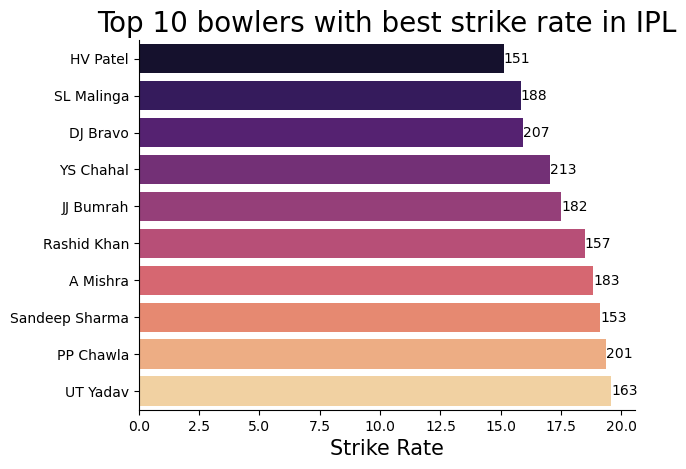

In [84]:
sns.barplot(x='strike_rate',y='bowler',data=merged.head(10),palette='magma',hue='bowler')
plt.title('Top 10 bowlers with best strike rate in IPL',fontsize=20)    
plt.xlabel('Strike Rate',fontsize=15)
plt.ylabel('')
sns.despine()
for i in range(10):
   plt.text(merged['strike_rate'].iloc[i], i, merged['wickets'].iloc[i], size=10, ha='left', va='center')
plt.show()


#The above graph shows the top 10 bowlers with best strike rate in IPL.
#The strike rate is calculated as the number of balls bowled divided by the number of wickets taken.
#The lower the strike rate, the better the bowler.
#The graph shows that the bowlers with the best strike rate are those who take wickets frequently and bowl fewer balls.


Bowlers and their bunnies

- which batsmen have been dismissed by the same bowler a number of times

In [99]:
df.groupby(['bowler','player_dismissed']).size().reset_index(name='count').sort_values('count',ascending=False).head(20)

,bowler,player_dismissed,count
8652,SP Narine,RG Sharma,8
6666,PP Ojha,MS Dhoni,7
1193,B Kumar,AM Rahane,7
10118,Z Khan,MS Dhoni,7
8931,Sandeep Sharma,V Kohli,7
161,A Mishra,RG Sharma,7
3679,JJ Bumrah,RR Pant,7
7246,RA Jadeja,GJ Maxwell,7
5484,MM Sharma,AT Rayudu,7
6871,R Ashwin,RV Uthappa,7


In [85]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
